# Capstone Project

## Background

We are glad you have successfully reached the capstone project part of "Data Science Fundamentals" course. You will put everything 
you have learned so far about data science to work. The outcome of this module should potentially serve as your portfolio item.

Unlike with previous projects, this time you are free to choose a dataset to explore from three suggested ones. As you will have to solve a provided problem, there will not be list of predefined questions that you have to answer - be creative and explore any dimensions of data you deem worth analyzing.

Although this might seem scary, this is how data science looks like in the industry. Often, it's your responsibility to not only give answers using the data, but also raise questions. The more creatively you look at this project, the better. Good luck!

----

## Requirements

Whichever problem you choose to analyze, general requirements are as follows:

#### Exploratory Data Analysis
* Describe the data with basic statistical parameters - mean, median, quantiles, etc. Use parameters that give you the most important statistical insights of the data.
* Grouping the data and analyzing the groups - using Pandas aggregate methods.
* Work with features - handle missing data if needed, use pandas date APIs.
* Manipulate datasets - use joins in needed.
* Visualize the data - you can use line, scatter, histogram plots, density plots, regplots, etc.

#### Statistical hypothesis testing
* Use at least one statistical significance test.
* Report p-values.
* Use visualizations.

#### Modeling
* Visualize data with dimensionality reduction algorithms.
* Perform cluster analysis.
* Use a linear model to explain relationships and predict new values.

#### Presentation
* Present the project - the data, methods and results.

## Problems

#### COVID-19 crisis 

<div><img width="400px" height="auto" src="https://images.unsplash.com/photo-1574515944794-d6dedc7150de?ixlib=rb-1.2.1&ixid=MXwxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHw%3D&auto=format&fit=crop&w=1532&q=80" /></div>

The world is still struggling with one the most rapidly spreading pandemics. There are a lot of people who say that data is the best weapon we can use in this "Corona Fight". 

Imagine that you are one of the best data scientists in your country. The president of your country asked you to analyze the COVID-19 patient-level data of South Korea and prepare your homeland for the next wave of the pandemic. You, as the lead data scientist of your country **have to create and prove a plan of fighting the pandemics in your country** by analyzing the provided data. You must get most important insights using learned data science techniques and present them to the lead of your country.

https://www.kaggle.com/kimjihoo/coronavirusdataset/

#### 2016 US presidential elections

<div><img width="400px" height="auto" src="https://images.unsplash.com/photo-1583340806569-6da3d5ea9911?ixlib=rb-1.2.1&ixid=MXwxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHw%3D&auto=format&fit=crop&w=1315&q=80" /></div>

In 2016, Donald Trump lost the popular vote, yet he won the electoral vote, securing 4 years in the Oval Office. This has been a shock to democrat supporters all around the world.

Imagine you travel back in time to 2016. As soon as you step out of your time-capsule, the Democratic Party hires you. They want you, the best data scientist across the time and space, **to explain what happened and what should have been done differently**. They want you to **prepare them for 2020 presidential elections**.

The Party has some tips for you - inspect the voters. What are Trump supporters? What do they feature? What are our supporters? Where should focus next? Any pro-trump states? Cities?

The Democrats were kind of enough to share [a Kaggle dataset](https://www.kaggle.com/benhamner/2016-us-election) with you on 2016 U.S. elections. Use the data to help the Democrats.

#### Fatal Police Shooting in United States

<div><img width="400px" height="auto" src="https://images.unsplash.com/photo-1606352466047-7cef02b312bb?ixlib=rb-1.2.1&ixid=MXwxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHw%3D&auto=format&fit=crop&w=1662&q=80" /></div>

[Police brutality in the United States](https://en.wikipedia.org/wiki/Police_brutality_in_the_United_States) has been a nationwide issue since the 20th century. Public safety of U.S. citizens is a typical argument to justify the controversially high number of fatal shootings.

You are a contractor to the United States Department of Justice. **You have been given a case to investigate fatal police shootings throughout the United States of America, provide a list of issues, and propose a plan on how to tackle these issues**.

The department offered some tips - the public opinion indicates that there's something systematically fishy of police actions against civilians, some states differ from other, some cities are different from others, race equality is still an unanswered question, there's some talk about huge spendings on police, rumors about mental issues of those getting shot. Government is all about prioritizing - use the data to list issues with the police activity and propose a plan which issues to tackle first and how.

You are given 1 dataset to start with. Try to search for more datasets to enrich your data analysis.

Here's the dataset:

* [Fatal Police Shootings in the U.S. '15 - '17](https://www.kaggle.com/washingtonpost/police-shootings).

## Evaluation Criteria

- Code quality
- Fulfillment of the idea
- Adherence to the requirements
- Delivery of the presentation

#### Statistical hypothesis testing
- Correct statistical test method is used, based on the situation.
- Reasoning on chosen statistical significance level.

#### Modeling

- Both PCA and T-SNE algorithms are used.

## Chosen problem

I decided to work on corona case. I'll try to see where people get sick, what determines, if a person dies after getting sick and propose actions that could be taken.

The data is from Kaggle dataset https://www.kaggle.com/kimjihoo/coronavirusdataset/ which compiled data from KCDC (Korea Centers for Disease Control & Prevention).


## Imports

In [24]:
import itertools

import geopandas as gpd
from kneed import KneeLocator
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import numpy as np
import pandas as pd
import scipy.stats as st
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.manifold import TSNE
from sklearn.metrics import classification_report
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from statsmodels.stats.proportion import proportions_ztest

sns.set_theme("talk")
%load_ext lab_black

The lab_black extension is already loaded. To reload it, use:
  %reload_ext lab_black


## EDA
### Cases

In [25]:
cases = pd.read_csv("data/Case.csv", index_col=0)
cases.head()

province          city  group               infection_case  \
 case_id                                                              
1000001     Seoul    Yongsan-gu   True                Itaewon Clubs   
1000002     Seoul     Gwanak-gu   True                      Richway   
1000003     Seoul       Guro-gu   True          Guro-gu Call Center   
1000004     Seoul  Yangcheon-gu   True  Yangcheon Table Tennis Club   
1000005     Seoul     Dobong-gu   True              Day Care Center   

          confirmed   latitude   longitude  
 case_id                                    
1000001         139  37.538621  126.992652  
1000002         119   37.48208  126.901384  
1000003          95  37.508163  126.884387  
1000004          43  37.546061  126.874209  
1000005          43  37.679422  127.044374

First I'm taking a look at data related to cases of covid.

Infection cases can be individual or group infections. Group infections mean that several infected people were traced down to a event in a single location where they got infected.

For every infection case I have its title, province it happened in and whether it's a group infection. I'm lacking city for roughly one third of the infections and latitude with longitude for about two thirds.

In [26]:
cases.replace("-", np.nan, inplace=True)
cases.loc[:, "longitude"] = cases.loc[:, "longitude"].astype(float)
cases.loc[:, "latitude"] = cases.loc[:, "latitude"].astype(float)

In [27]:
# shape files downloaded from www.diva-gis.org/ at 2021-01-08
korea_gdf = gpd.read_file("data/SK_maps/KOR_adm1.shp").to_crs(epsg=4326)[
    ["NAME_1", "ENGTYPE_1", "geometry"]
]
korea_gdf = korea_gdf.set_index("NAME_1")

In [28]:
def plot_map_and_bars(
    data: gpd.GeoDataFrame, column: str, title: str, log: bool = False, value_axis_label: str = None
) -> None:
    """Plots data with choropleth map and bar plot side-by-side.

    Args:
        data (gpd.GeoDataFrame): dataframe to be plotted,
            its index will be used for labels
        column (str): column name with values to plot
        title (str): title of the whole graph
        log (bool, optional): log scales values if True. Defaults to False.
        value_axis_label (str, optional): human readable title for the data in the :column:
    """
    if log:
        norm = colors.LogNorm(vmin=data[column].min(), vmax=data[column].max())
    else:
        norm = colors.Normalize(vmin=data[column].min(), vmax=data[column].max())
    value_axis_label = value_axis_label or column

    data = data.sort_values(column, ascending=False)
    data["geometry"] = data.geometry.simplify(0.01)

    fig = plt.figure(figsize=(20, 10))
    fig.suptitle(title, fontsize=24)

    cmap = sns.color_palette("plasma", as_cmap=True)
    palette = [cmap(norm(val)) for val in data[column]]

    ax = plt.subplot(1, 2, 1)
    data.plot(
        column=column,
        ax=ax,
        cmap=cmap,
        legend=True,
        norm=norm
    )

    ax = plt.subplot(1, 2, 2)
    ax = sns.barplot(data=data, x=column, y=data.index, ax=ax, log=log, palette=palette)
    ax.set_xlabel(value_axis_label)
    ax.set_ylabel("")

    plt.tight_layout()
    fig.show()

#### Number of covid cases by province

Seoul has reported more infection cases than any other and four provinces with the most cases have as many cases the rest of them combined.

In [29]:
num_cases_by_province = cases.groupby("province").agg(count=("province", "count"))

cases_gdf = pd.merge(
    left=korea_gdf,
    right=num_cases_by_province,
    left_index=True,
    right_index=True,
)

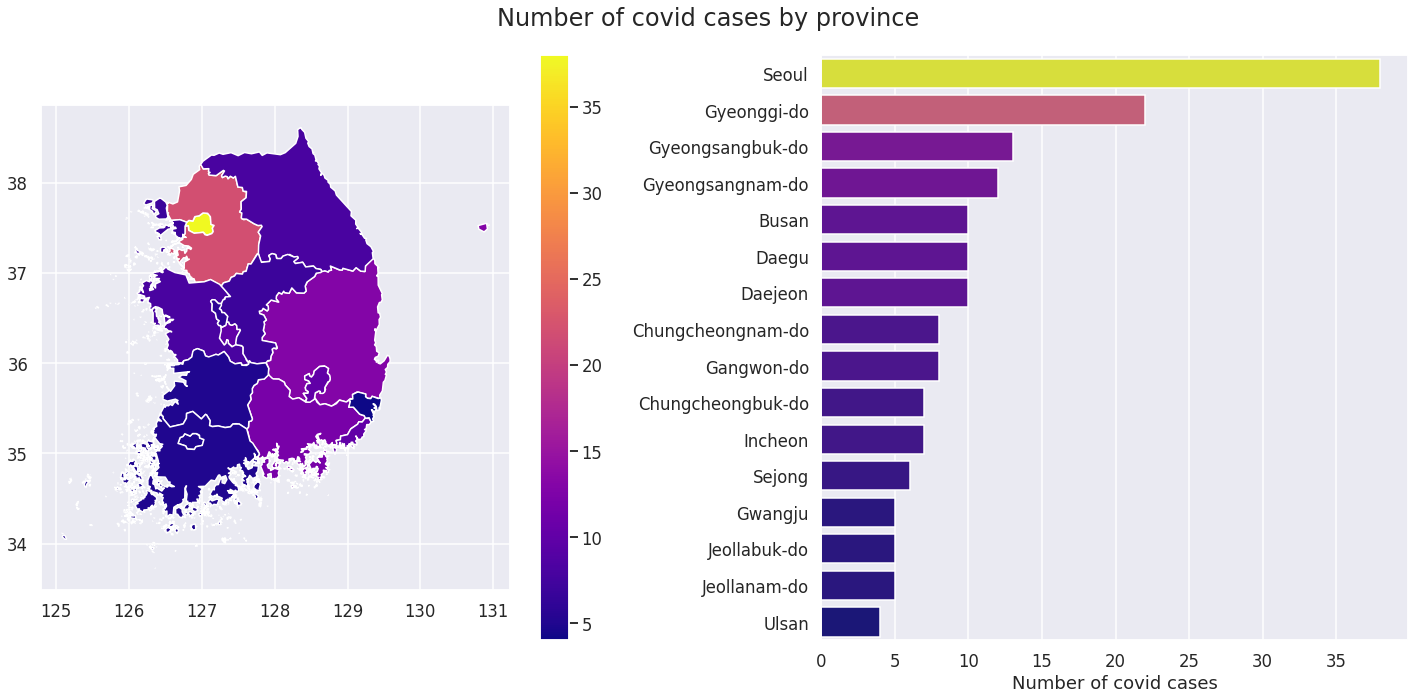

In [30]:
plot_map_and_bars(
    data=cases_gdf, column="count", title="Number of covid cases by province", value_axis_label="Number of covid cases"
)

#### Number of people infected with covid by province

Looking at total number of covid cases can be misleading as there could be a lot of small-scale infection outbreaks. Not a lot of people would be infected but a lot of distinct cases.

If we look at the number of people infected with covid by province, we see there were more people infected in Daegu than in the rest of South Korea combined, even though there were not that many infection cases in Daegu. Quite likely first infections in South Korea happened in Daegu when social distancing measures were not introduced yet.

In [31]:
total_confirmed = cases.groupby("province")["confirmed"].sum()
total_confirmed_gdf = pd.merge(
    left=korea_gdf,
    right=total_confirmed,
    how="left",
    left_index=True,
    right_on="province",
).drop("province", axis="columns")
total_confirmed_gdf = total_confirmed_gdf.sort_values("confirmed", ascending=False)

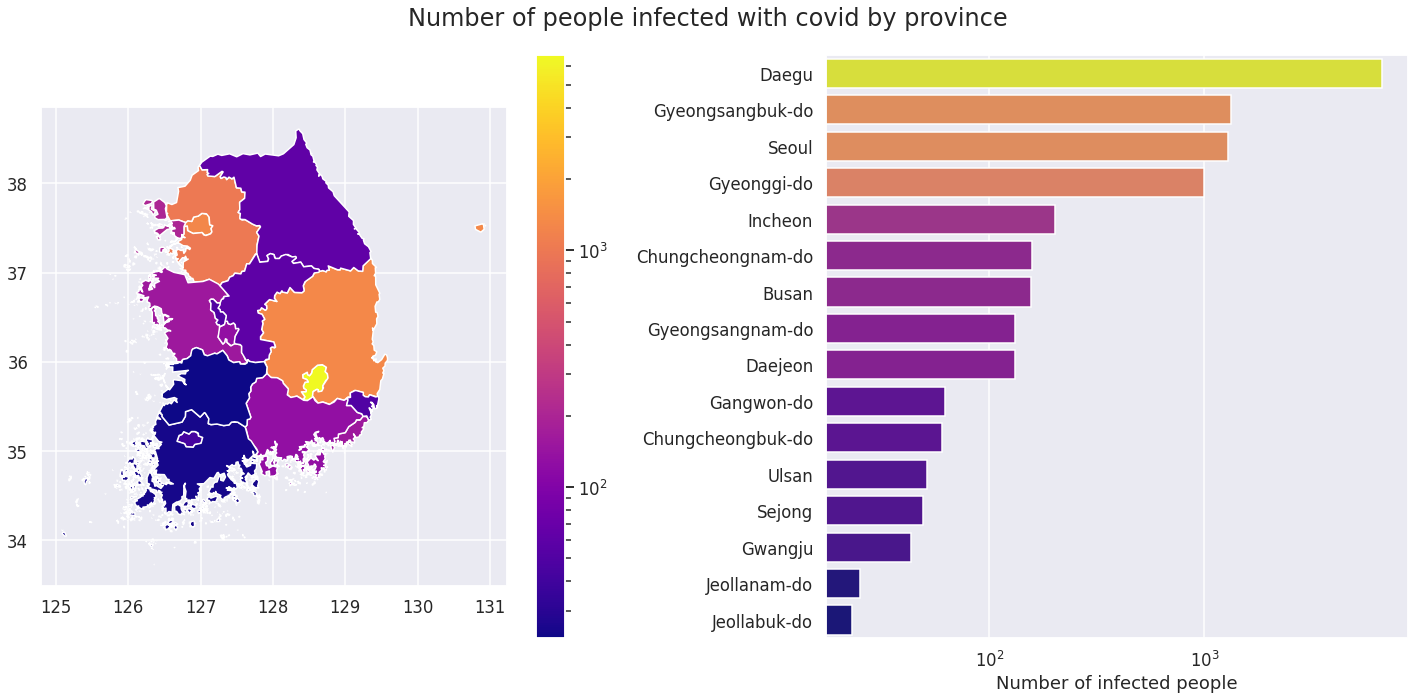

In [32]:
plot_map_and_bars(
    data=total_confirmed_gdf,
    column="confirmed",
    title="Number of people infected with covid by province",
    log=True,
    value_axis_label="Number of infected people",
)

#### Number of infections per 1000 pop

Seoul is the most populous city in South Korea and it would be better compare number of infected people per population size.

I downloaded latest available population data for South Korea from https://www.citypopulation.de/en/southkorea/cities/ . It is estimate of population size for each province at the end of 2019.

In [33]:
# data taken from https://www.citypopulation.de/en/southkorea/cities/ accessed at 2021-01-09
population_df = pd.read_csv("data/Population.csv")

In [34]:
latest_population_df = population_df.loc[
    :, ["Name", "Population\nEstimate (E)\n2019-12-31"]
].rename(
    columns={"Name": "province", "Population\nEstimate (E)\n2019-12-31": "2019_pop"}
)

In [35]:
infections_per_pop_gdf = pd.merge(
    left=total_confirmed_gdf,
    right=latest_population_df,
    how="left",
    left_index=True,
    right_on="province",
).set_index("province")
infections_per_pop_gdf.loc[:, "infections_per_1000_pop"] = (
    infections_per_pop_gdf.confirmed / infections_per_pop_gdf.loc[:, "2019_pop"] * 1000
)

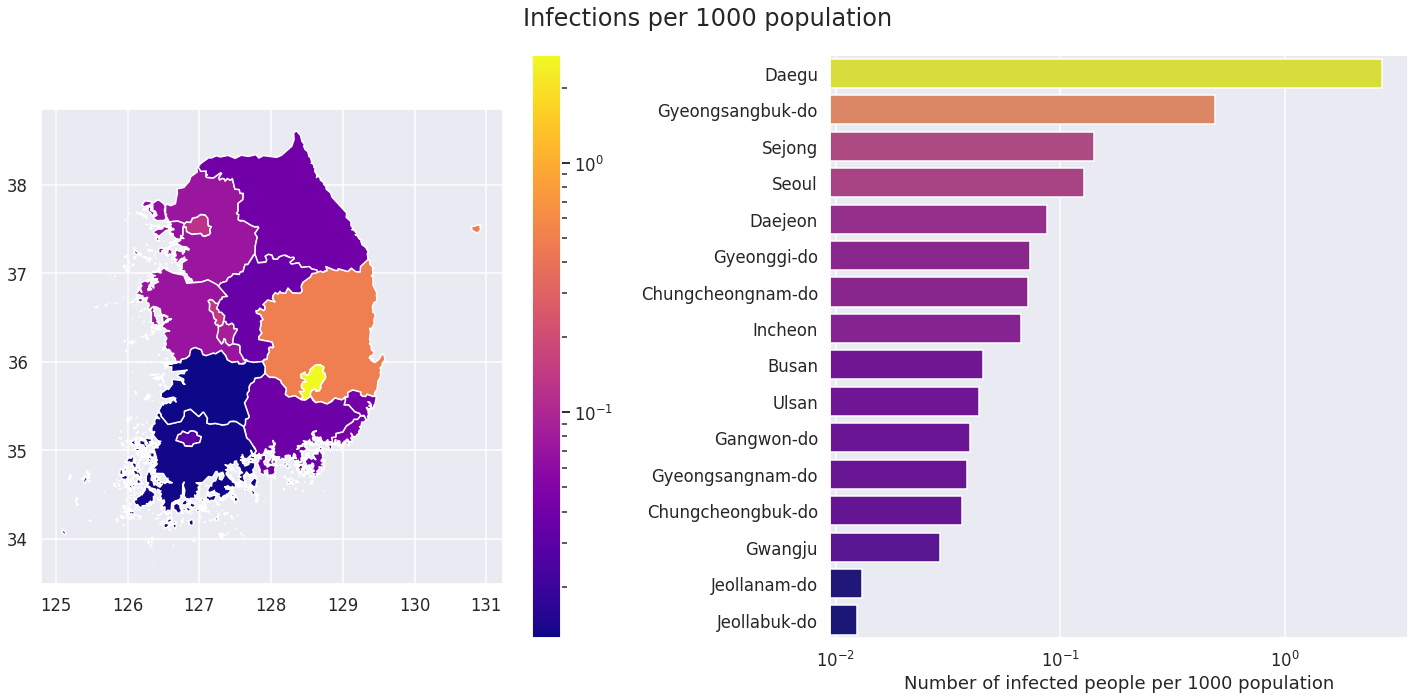

In [36]:
plot_map_and_bars(
    data=infections_per_pop_gdf,
    column="infections_per_1000_pop",
    title="Infections per 1000 population",
    log=True,
    value_axis_label="Number of infected people per 1000 population"
)

So Seoul really does ok for its population size while Daegu fares comparatively horrible.

From the last three graphs we could have seen that Seoul has a lot of small infection cases while Daegu had several explosive ones. Upshot being that Daegu has the most infected people in whole South Korea both by absolute numbers and as a proportion of population.

#### Infection cases

After looking at the data more closely - infected_case seems to be:

1. a title of location where an outbreak happened when infections can be traced to a single event.
1.  
    - etc for unknown and ongoing investigations
    - overseas inflow for people arriving infected
    - contact with patient
    
So it seems like Seoul had a lot of small outbreaks while Daegu had several explosive ones. I'd love to commend South Korea's tracing program as it seems that majority of infections are traced down to a cause.

I'll group cases to better make sense of them.

In [37]:
cases.loc[:, "grouped_infection_case"] = cases.infection_case.replace(
    {
        "Itaewon Clubs": "Recreation",
        "Richway": "Recreation",
        "Guro-gu Call Center": "Indoors work",
        "Yangcheon Table Tennis Club": "Recreation",
        "Day Care Center": "School",
        "Manmin Central Church": "Religious congregation",
        "SMR Newly Planted Churches Group": "Religious congregation",
        "Dongan Church": "Religious congregation",
        "Coupang Logistics Center": "Indoors work",
        "Wangsung Church": "Religious congregation",
        "Eunpyeong St. Mary's Hospital": "Hospital",
        "Seongdong-gu APT": "District",
        "Jongno Community Center": "Recreation",
        "Samsung Medical Center": "Hospital",
        "Jung-gu Fashion Company": "Indoors work",
        "Yeonana News Class": "School",
        "Korea Campus Crusade of Christ": "Religious congregation",
        "Gangnam Yeoksam-dong gathering": "Recreation",
        "Daejeon door-to-door sales": "Door-to-door sales",
        "Geumcheon-gu rice milling machine manufacture": "Indoors work",
        "Shincheonji Church": "Religious congregation",
        "Guri Collective Infection": "Recreation",
        "KB Life Insurance": "Indoors work",
        "Yeongdeungpo Learning Institute": "School",
        "Gangnam Dongin Church": "Religious congregation",
        "Biblical Language study meeting": "Religious congregation",
        "Seocho Family": "District",
        "Anyang Gunpo Pastors Group": "Religious congregation",
        "Samsung Fire & Marine Insurance": "Indoors work",
        "SJ Investment Call Center": "Indoors work",
        "Yongin Brothers": "District",
        "Seoul City Hall Station safety worker": "Indoors work",
        "Uiwang Logistics Center": "Indoors work",
        "Orange Life": "Indoors work",
        "Daezayeon Korea": "Door-to-door sales",
        "Onchun Church": "Religious congregation",
        "Suyeong-gu Kindergarten": "School",
        "Haeundae-gu Catholic Church": "Religious congregation",
        "Jin-gu Academy": "School",
        "Cheongdo Daenam Hospital": "Hospital",
        "Second Mi-Ju Hospital": "Hospital",
        "Hansarang Convalescent Hospital": "Hospital",
        "Daesil Convalescent Hospital": "Hospital",
        "Fatima Hospital": "Hospital",
        "Gwangneuksa Temple": "Religious congregation",
        "Door-to-door sales in Daejeon": "Door-to-door sales",
        "Dunsan Electronics Town": "District",
        "Orange Town": "District",
        "Dreaming Church": "Religious congregation",
        "Korea Forest Engineer Institute": "School",
        "Seosan-si Laboratory": "School",
        "Ministry of Oceans and Fisheries": "Indoors work",
        "gym facility in Sejong": "Recreation",
        "River of Grace Community Church": "Religious congregation",
        "Uijeongbu St. Mary’s Hospital": "Hospital",
        "Bundang Jesaeng Hospital": "Hospital",
        "Lotte Confectionery logistics center": "Indoors work",
        "Lord Glory Church": "Religious congregation",
        "Suwon Saeng Myeong Saem Church": "Religious congregation",
        "Seongnam neighbors gathering": "Recreation",
        "Wonju-si Apartments": "District",
        "Goesan-gun Jangyeon-myeon": "District",
        "gym facility in Cheonan": "Recreation",
        "Eunpyeong-Boksagol culture center": "Recreation",
        "Bonghwa Pureun Nursing Home": "Shelters and nursing homes",
        "Gyeongsan Seorin Nursing Home": "Shelters and nursing homes",
        "Pilgrimage to Israel": "Religious congregation",
        "Yechun-gun": "District",
        "Milal Shelter": "Shelters and nursing homes",
        "Gyeongsan Jeil Silver Town": "District",
        "Gyeongsan Cham Joeun Community Center": "Recreation",
        "Gumi Elim Church": "Religious congregation",
        "Geochang Church": "Religious congregation",
        "Wings Tower": "District",
        "Geochang-gun Woongyang-myeon": "District",
        "Hanmaeum Changwon Hospital": "Hospital",
        "Changnyeong Coin Karaoke": "Recreation",
        "Soso Seowon": "District",
        "etc": "Etc",
        "contact with patient": "Contact with patient",
        "overseas inflow": "Overseas inflow",
    }
)
cases_count_by_infection_group = (
    cases.groupby("grouped_infection_case")
    .agg(count=("province", "count"), confirmed=("confirmed", "sum"))
    .sort_values("confirmed", ascending=False)
    .reset_index()
)

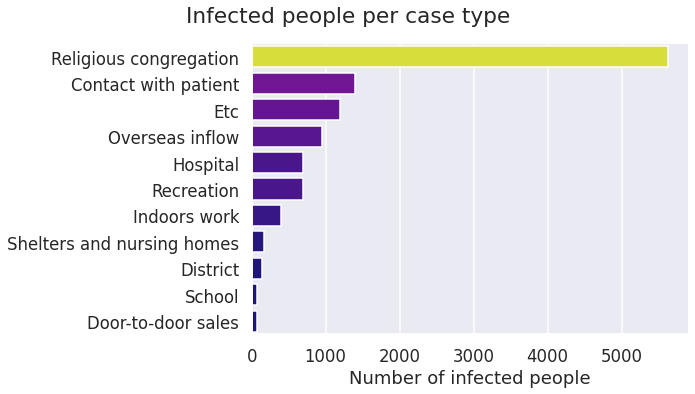

In [38]:
norm = colors.Normalize(
    vmin=cases_count_by_infection_group["confirmed"].min(),
    vmax=cases_count_by_infection_group["confirmed"].max(),
)
cmap = sns.color_palette("plasma", as_cmap=True)
palette = [cmap(norm(val)) for val in cases_count_by_infection_group["confirmed"]]

g = sns.catplot(
    data=cases_count_by_infection_group,
    x="confirmed",
    y="grouped_infection_case",
    kind="bar",
    height=5,
    aspect=2,
    palette=palette,
)
g.fig.suptitle("Infected people per case type", y=1.05)
g.set_axis_labels(x_var="Number of infected people", y_var="")

I've grouped infection cases by activity during which people were infected. This is not necessarily the best way to group the cases, but it's way easier to make sense from this grouping than looking at individual cases.

I've lumped together all religious congregations - most of them were in Christian churches, but several congregations in temples and by religious youth organization got included as well.  
Contact with patient, Etc and Overseas inflow are original case types from the data.  
All infections in hospitals - both of medical staff and of patients - are grouped together.  
Recreation - some activity that people do outside their home at their own leisure. Sport clubs, gyms, non-religious neighbourhood gatherings got included here.  
Indoors work - people got infected during their work. Mostly warehouse workers.  
District - I googled that infection case title and google returned me a district. I.e., I failed to discern activity/location with greater clarity.  

More people got infected during a religious congregation than during any other activity combined.

### Patient info

Here I'm taking a quick look at data related to individual patients.

I have information about less infections individually than I had for as part of an infection case. I have individual information for roughly half of infections.

Majority of patients lack data for:

1. infected_by
1. symptom_onset_date
1. released_date
1. contact_number

Significant amount of patients lack age and sex info as well. Ah well.

In [39]:
def age_to_number(x):
    try:
        return int(x[:-1])
    except Exception:
        return np.nan


patient_info = pd.read_csv(
    "data/PatientInfo.csv", parse_dates=True, converters={"age": age_to_number}
)

In [40]:
individual_infections_by_province = patient_info.groupby("province").agg(
    individual_count=("patient_id", "count")
)
infections_by_province = individual_infections_by_province.join(total_confirmed)

In [41]:
st.chisquare(
    f_obs=infections_by_province.individual_count,
    f_exp=infections_by_province.confirmed,
)

Power_divergenceResult(statistic=6558.292470994047, pvalue=0.0)

I don't simply have less information. Seems like I lauded South Korea's tracing too early. There are significant - both practical and statistical - variations with the kind of data I have from different provices. The most glaring difference is number of infections in Daegu.

In [42]:
st.chisquare(
    f_obs=infections_by_province.drop("Daegu").individual_count,
    f_exp=infections_by_province.drop("Daegu").confirmed,
)

Power_divergenceResult(statistic=149.48274045512596, pvalue=3.0561555311019777e-24)

So no, just dropping Daegu is not enough to say that whatever my findings are, they apply to whole South Korea (minus Daegu). My analysis of data for individual infections should be taken with a pound of salt due to data mismatch and a grain of pepper cause I may be stupid.

Almost half of released patients don't have the date they are released marked.

### Do people of different ages get sick at the same rate?

Text(0.5, 1.02, 'Distribution of ages for individual patients')

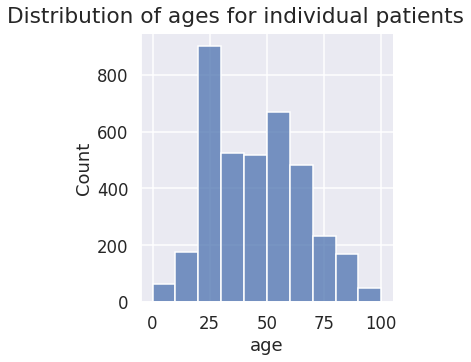

In [43]:
g = sns.displot(x=patient_info.age, binwidth=10)
g.fig.suptitle("Distribution of ages for individual patients", y=1.02)

People in their 20s seem overrepresented.

Text(0.5, 1.02, 'Distribution of gender for individual patients')

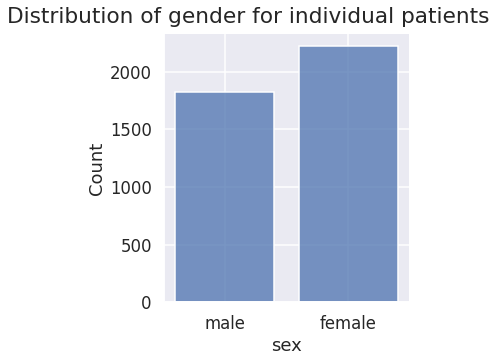

In [44]:
g = sns.displot(x=patient_info.sex.dropna(), shrink=0.8, kind="hist")
g.fig.suptitle("Distribution of gender for individual patients", y=1.02)

In [80]:
# by https://www.indexmundi.com/south_korea/sex_ratio.html (accessed at 2021-01-10)
# in South Korea males:females ratio for population as a whole is 100.5:100
expected_female_proportion = 100 / (100 + 100.5)
patient_sex_counts = patient_info.groupby("sex").agg(observed=("sex", "count"))
z_score, p_value = proportions_ztest(
    count=patient_sex_counts.loc["female", "observed"],
    nobs=patient_sex_counts.loc[["male", "female"], "observed"].sum(),
    value=expected_female_proportion,
    alternative="larger",  # more females are infected with covid than man
)
print(f"Z score: {z_score}, p value: {p_value}")

Z score: 6.369471394378676, p value: 9.484039581846503e-11


If two assumptions hold true:
- male and female get tested at roughly the same rate
- gender isn't reported for males and females at the same rate

Then females get infected with covid significantly more often than males.

### TimeAge

I wanted to check what influences if a person dies from covid.

Age should be a strong predictor.

Since I didn't have a lot of data for patients individually, I'm checking another dataset of covid infections/deaths by time, hoping I'll have data for more infections here.

In [46]:
time_age = pd.read_csv(
    "data/TimeAge.csv",
    converters={"age": age_to_number},
    parse_dates=True,
    index_col="date",
)

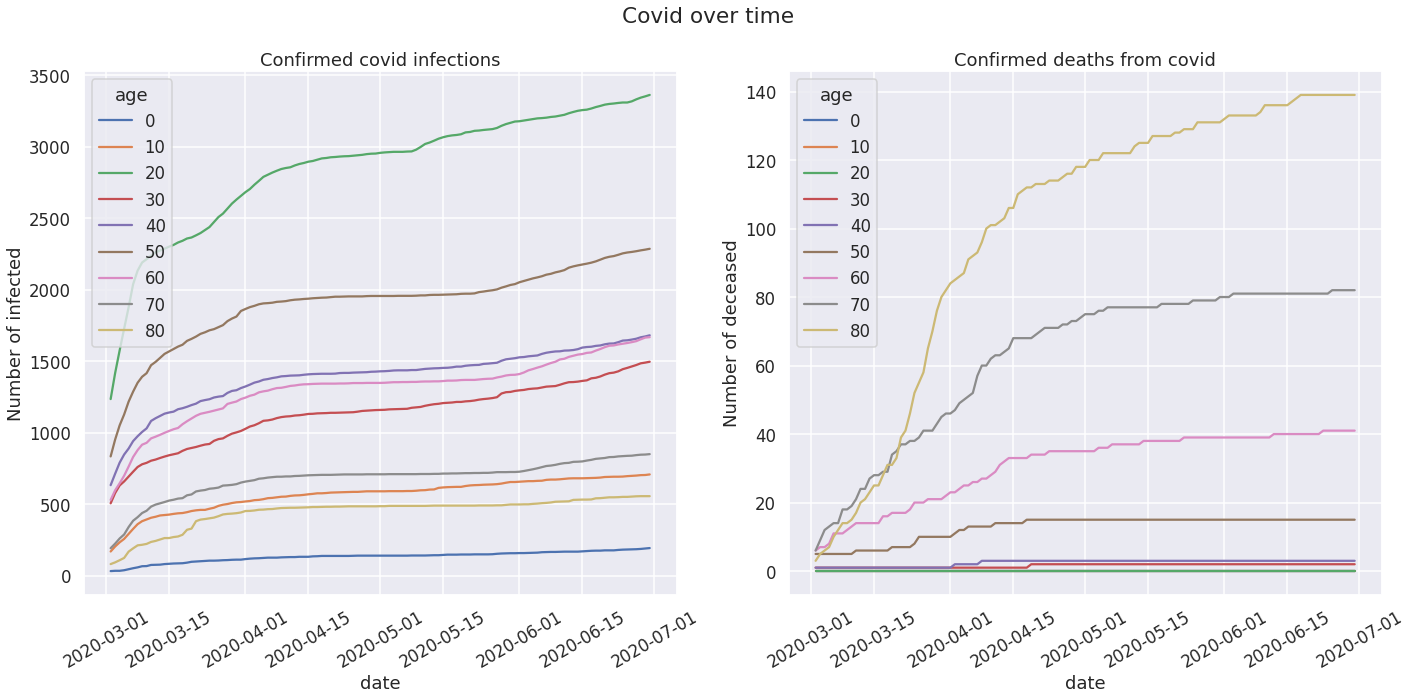

In [47]:
fig = plt.figure(figsize=(20, 10))
fig.suptitle("Covid over time")

ax = plt.subplot(1, 2, 1)
ax = sns.lineplot(
    data=time_age, x=time_age.index, y="confirmed", hue=time_age.age.astype(str), ax=ax
)
ax.title.set_text("Confirmed covid infections")
ticks = plt.xticks(rotation=30)  # getting only month and day to show up would be nice
plt.ylabel("Number of infected")

ax = plt.subplot(1, 2, 2)
ax = sns.lineplot(
    data=time_age, x=time_age.index, y="deceased", hue=time_age.age.astype(str), ax=ax
)
ax.title.set_text("Confirmed deaths from covid")
ticks = plt.xticks(rotation=30)  # getting only month and day to show up would be nice
plt.ylabel("Number of deceased")

plt.tight_layout()
fig.show()

Just taking data for last date we'll get information on total infections/deaths for age groups.

In [83]:
last_data = (
    time_age.loc["2020-06-30"].reset_index().drop(["date", "time"], axis="columns")
)

print(
    f"There is data for {last_data.confirmed.sum()} infections if we are only interested in age "
    f"compared to {patient_info.age.notna().sum()} individual infections."
)

There is data for 12800 infections if we are only interested in age compared to 3785 individual infections.


So yeah, I do have more than triple the number of infections where I only know the age of infected person, as opposed to more detailed tracing information.

## Hypothesis testing

### Are older people more vulnerable to covid than youngsters?

Null hypothesis: young people die at the same rate or greater rate from covid than old people  
Alternative hypothesis: old people die from covid more often

I'll use 95% confidence interval (significance level p=0.05)

My analysis overstates survivability of covid. It counts everyone not dead as having survived the disease, even though they may currently be sick and die later.

In [84]:
young_cutoff = 39  # up to people in their 30s, ie., up to 39 yo
old_cutoff = 59  # from 60 yo

age_cat = pd.cut(
    last_data.age,
    bins=[0, young_cutoff, old_cutoff, 1000],
    labels=["young", "middle-aged", "old"],
    include_lowest=True,
)
last_data.loc[:, "age_cat"] = age_cat

In [85]:
grouped_by_age_cat = last_data.groupby("age_cat")[["confirmed", "deceased"]].sum()

In [51]:
z_score, p_value = proportions_ztest(
    count=grouped_by_age_cat.loc[["young", "old"], "deceased"],
    nobs=grouped_by_age_cat.loc[["young", "old"], "confirmed"],
    alternative="smaller",  # death ratio of young people is smaller than death ratio of old people
)
print(f"Z score: {z_score}, p value: {p_value}")

Z score: -22.317049978192596, p value: 1.262019258868344e-110


We can safely reject null hypothesis in favor of alternative hypothesis that old people die from covid at a greater rate than young people. Interesting question now is, by how much?

In [86]:
death_ratio = (
    grouped_by_age_cat["deceased"]
    / (grouped_by_age_cat["confirmed"] + grouped_by_age_cat["deceased"])
).to_frame("mean_ratio")

In [53]:
death_ratio.loc["old", "mean_ratio"] / death_ratio.loc["young", "mean_ratio"]

226.2263189448441

So in South Korea people above 60 are more than 200 times more likely to die from Covid than people below 40.

## What factors influence if a person dies?

So we've learnt that age strongly increases probability of dying. What else?

In [87]:
age_cat = pd.cut(
    patient_info.age,
    bins=[0, young_cutoff, old_cutoff, 1000],
    labels=["young", "middle-aged", "old"],
    include_lowest=True,
)
patient_info.loc[:, "age_cat"] = age_cat
assert (
    patient_info.dropna(subset=["age_cat"]).index
    == patient_info.dropna(subset=["age"]).index
).all()
patient_info.loc[:, "age_cat"] = patient_info.age_cat.cat.add_categories("Unknown")

In [88]:
infection_case_groupings = cases[["infection_case", "grouped_infection_case"]]
infection_case_groupings = infection_case_groupings.groupby("infection_case")[
    "grouped_infection_case"
].max()

Text(0.5, 1.02, 'How did individual patients get infected?')

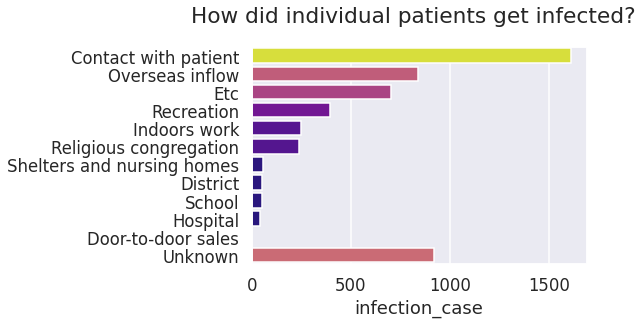

In [118]:
ic = patient_info.infection_case.copy()
ic.replace(infection_case_groupings, inplace=True)
ic.fillna("Unknown", inplace=True)
ic = ic.value_counts()
ic = pd.concat([ic.drop("Unknown").sort_values(ascending=False), ic.loc[["Unknown"]]])

norm = colors.Normalize(vmin=ic.min(), vmax=ic.max())
cmap = sns.color_palette("plasma", as_cmap=True)
palette = [cmap(norm(val)) for val in ic]

g = sns.barplot(y=ic.index, x=ic, palette=palette)
plt.suptitle("How did individual patients get infected?", y=1.02)

Hm, from the data that included Daegu we saw that majority of infections happen in religious congregations. In this graph infections in religious congregation appear way less often than contact with patient, so it seems that we lack tracing data from religious congregations that happened mostly in Daegu. Also hospital infections seem underrepresented.

In [90]:
patient_info.loc[:, "grouped_infection_case"] = ic
patient_info.loc[:, ["sex", "age_cat"]] = patient_info[["sex", "age_cat"]].fillna(
    "Unknown"
)
# there is some data leakage here, hopefully w/e
one_hot_encoder = OneHotEncoder().fit(
    patient_info[["province", "sex", "grouped_infection_case", "age_cat"]]
)
categorical_features = one_hot_encoder.transform(
    patient_info[["province", "sex", "grouped_infection_case", "age_cat"]]
).todense()

In [91]:
# drop features about "isolated" states
states = patient_info.loc[patient_info.state != "isolated", "state"]
categorical_features = categorical_features[states.index]

### Visualization

Text(15.439999999999998, 0.5, 'Proportion of explained variance')

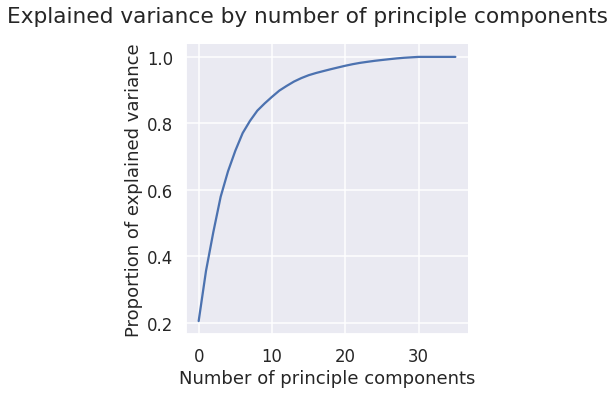

In [92]:
pca = PCA().fit(categorical_features)
cumul_variance_explained = np.cumsum(pca.explained_variance_ratio_)
g = sns.relplot(x=range(pca.n_components_), y=cumul_variance_explained, kind="line")
g.fig.suptitle("Explained variance by number of principle components", y=1.05)
g.axes[0, 0].set_xlabel("Number of principle components")
g.axes[0, 0].set_ylabel("Proportion of explained variance")

In [93]:
cumul_variance_explained[2]

0.4733166241689665

Hm, first two principal components explain just a tad under 50% of variance. Let's see what we get.

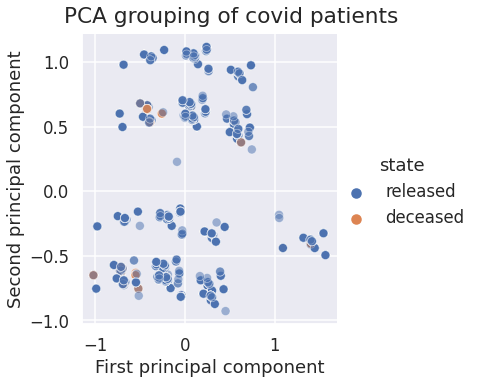

In [94]:
pca_features = pca.transform(categorical_features)
g = sns.relplot(x=pca_features[:, 0], y=pca_features[:, 1], hue=states, alpha=0.5)
g.fig.suptitle("PCA grouping of covid patients", y=1.02)
g.set_xlabels("First principal component")
g.set_ylabels("Second principal component")

By PCA, there's two groups of people that have higher probability to die. Let's see if t-SNE confirms that.

Text(0.5, 1.02, 'TSNE grouping of covid patients')

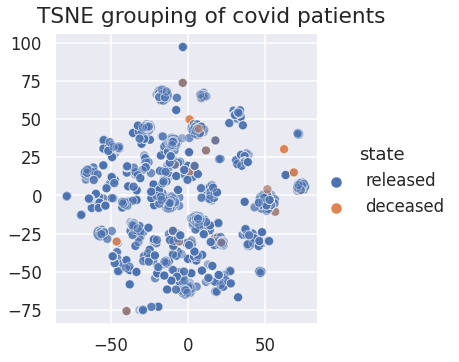

In [146]:
tsne_features = TSNE(perplexity=10).fit_transform(categorical_features)
g = sns.relplot(x=tsne_features[:, 0], y=tsne_features[:, 1], hue=states, alpha=.5)
g.fig.suptitle("TSNE grouping of covid patients", y=1.02)

PCA did a better job of getting people that did die together.

We can only visualize two principal components and they explain less than 50% of variance in the data. Let's try clustering the data to see if it forms nice clusters model could separate by.

Text(0.5, 0.98, 'Determining the number of clusters by elbow method')

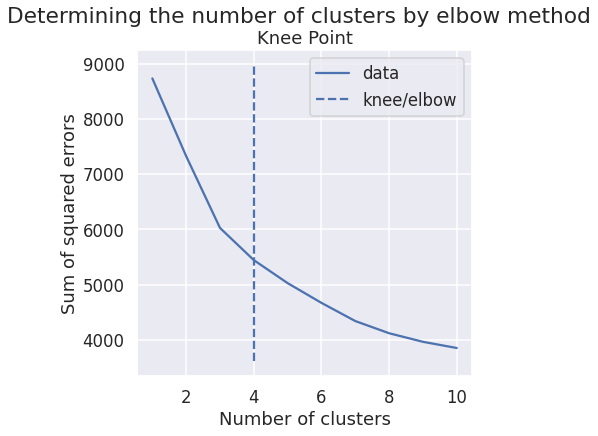

In [96]:
kmeans_kwargs = {
    "init": "random",
    "n_init": 10,
    "max_iter": 300,
    "random_state": 42,
}

squared_errors_sums = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(categorical_features)
    squared_errors_sums.append(kmeans.inertia_)

kl = KneeLocator(
    range(1, 11), squared_errors_sums, curve="convex", direction="decreasing"
)

kl.plot_knee()
plt.xlabel("Number of clusters")
plt.ylabel("Sum of squared errors")
plt.suptitle("Determining the number of clusters by elbow method")

Using 4 clusters seems as reasonable of a decision as any other. Looking at the PCA graph, we might need 5 clusters, but let's see.

In [143]:
kmeans = KMeans(n_clusters=5, **kmeans_kwargs)
result = kmeans.fit(categorical_features)

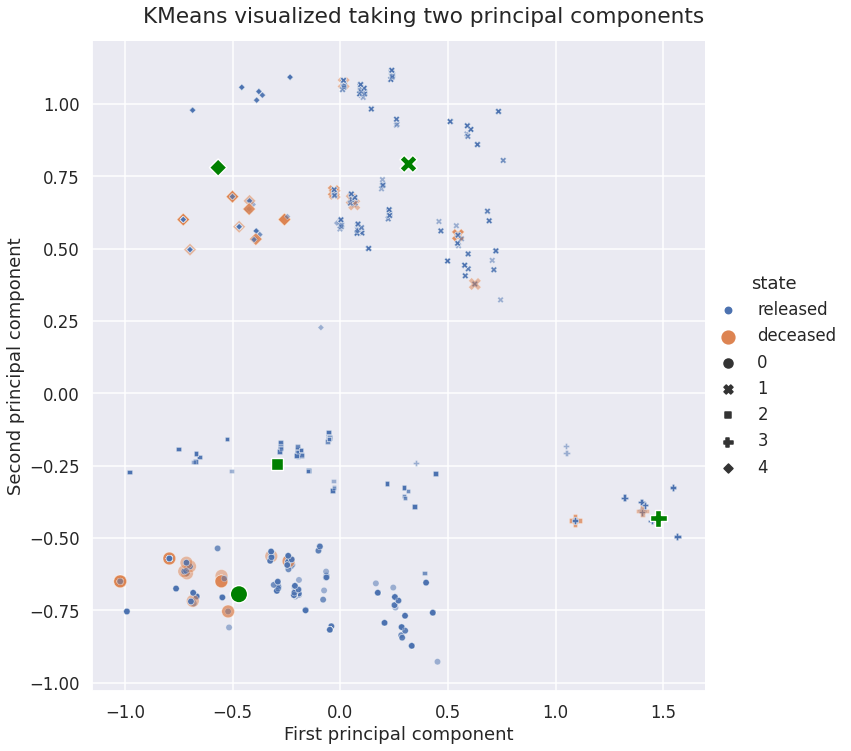

In [144]:
pca_centers = pca.transform(result.cluster_centers_)

g = sns.relplot(
    x=pca_features[:, 0],
    y=pca_features[:, 1],
    style=result.labels_,
    hue=states,
    size=states,
    size_order=["deceased", "released"],
    height=10,
    alpha=.5
)
cluster_centers = sns.scatterplot(
    x=pca_centers[:, 0],
    y=pca_centers[:, 1],
    style=np.unique(result.labels_),
    s=300,
    legend=False,
    color="green",
)

g.fig.suptitle("KMeans visualized taking two principal components", y=1.02)
g.set_xlabels("First principal component")
g.set_ylabels("Second principal component")

People that died from covid mostly fall into three different clusters. One of them have disproportionate amount of people who died, the rest are pretty mixed. There is a also a cluster 3 with relatively small number of people in it, some of which had died. Simple linear model is going to have a hard time predicting risk of death from covid ._.

## Linear model explaining death rates

In [135]:
indices = np.arange(categorical_features.shape[0])
np.random.seed(42)
np.random.shuffle(indices)
train_ratio = 0.8
train_indices = indices[: int(len(states) * train_ratio)]
test_indices = indices[int(len(states) * train_ratio) :]
assert "deceased" in states.iloc[test_indices].unique()
encoded_states = states == "deceased"  # Ensure that deceased gets marked as event

In [136]:
model = LogisticRegression(fit_intercept=True)
model.fit(categorical_features[train_indices], encoded_states.iloc[train_indices])

LogisticRegression()

In [137]:
y_pred = model.predict(categorical_features[test_indices])
y_true = encoded_states.iloc[test_indices]

print(
    classification_report(
        y_true, y_pred, labels=[0, 1], target_names=["released", "deceased"]
    )
)

              precision    recall  f1-score   support

    released       0.98      1.00      0.99       588
    deceased       1.00      0.36      0.53        14

    accuracy                           0.99       602
   macro avg       0.99      0.68      0.76       602
weighted avg       0.99      0.99      0.98       602



This simple model doesn't do that good of a job predicting who has higher risk to die from covid. With this particular seed it only correctly identified 1 out of every 3 patients that died from covid. We can however extract some useful data, since every patient that it predicted as dying did indeed die. 

In [138]:
pd.DataFrame(data=np.exp(model.coef_[0]), index=itertools.chain.from_iterable(one_hot_encoder.categories_))

0
Busan                        1.232362
Chungcheongbuk-do            0.659499
Chungcheongnam-do            0.569723
Daegu                       22.273206
Daejeon                      0.728058
Gangwon-do                   2.602848
Gwangju                      0.958651
Gyeonggi-do                  0.583532
Gyeongsangbuk-do             1.030589
Gyeongsangnam-do             0.439620
Incheon                      0.536996
Jeju-do                      0.960047
Jeollabuk-do                 0.789304
Jeollanam-do                 0.756458
Sejong                       0.817560
Seoul                        0.532154
Ulsan                        1.507137
Unknown                      1.429372
female                       0.503599
male                         1.388913
Contact with patient         0.900827
District                     1.251352
Door-to-door sales           1.000000
Etc                          1.235986
Hospital                     3.960997
Indoors work                 0.563784
Overseas inflow              0.310485
Recreation                   0.391491
Religious congregation       0.505859
School                       2.206844
Shelters and nursing homes   1.037557
Unknown                      2.282330
Unknown                      1.193493
middle-aged                  0.793945
old                          6.705520
young                        0.157348

Catching virus in a hospital increases chances of dying from virus nearly seven times.

## Conclusion

#### How to prevent infections

Religious congregations are responsible for a majority of new infections. It'd be great if remote solutions could be found.  
After that the largest reason for new infections is contact with a patient. Contacts should be traced faster if possible so those that had contact with an infected wouldn't spread covid unknowlingly.  

Majority of infections happen indoors. Indoors gatherings should be limited and catching covid outdoors seems to be extremely unlikely.

#### How to prevent deaths from covid

Daegu's province hospitals seem overloaded. The single highest predictor for person dying seems to be whether they caught a disease in Daegu. That means new infections in Daegu must be prevented and I would say lockdowns limiting how many people can be in one place would be the most effective.

Then we get to vulnerable people.
- Old people
- People who are already in hospital due to covid unrelated health issues